# Identify Maximally Representative Partition (FC MegaMat, BNA)

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bct
import cmocean
from scipy.spatial import distance
from scipy import stats
from nilearn import surface, plotting, image, regions

/home/despoB/dlurie/anaconda3/envs/timescale/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
megamat = np.genfromtxt('/home/despoB/dlurie/Projects/timescale_hierarchy/results/Combined_HCP-Shine1-CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po.csv')

In [5]:
def load_partitions(data_dir):
    gamma_range = np.arange(5,36,1) / 10
    partition_store = []
    matrix_store = []
    q_store = []
    vi_store = []
    mi_store = []
    pc_store = []
    wd_store = []
    for y in gamma_range:
        part_data = np.genfromtxt(f'{data_dir}/gamma_{y}_GraphPartition.txt')
        mat_data = np.genfromtxt(f'{data_dir}/gamma_{y}_ReorderedMatrix.txt')
        q_data = np.genfromtxt(f'{data_dir}/gamma_{y}_ModularityQ.txt')
        vi_data = np.genfromtxt(f'{data_dir}/gamma_{y}_meanVI.txt')
        mi_data = np.genfromtxt(f'{data_dir}/gamma_{y}_meanMI.txt')
        pc_data = np.genfromtxt(f'{data_dir}/gamma_{y}_PC.txt')
        wd_data = np.genfromtxt(f'{data_dir}/gamma_{y}_WMDz.txt')
        
        partition_store.append(part_data)
        matrix_store.append(mat_data)
        q_store.append(q_data)
        vi_store.append(float(vi_data))
        mi_store.append(float(mi_data))
        pc_store.append(pc_data)
        wd_store.append(wd_data)
    
    return np.array(partition_store), np.array(matrix_store), \
           np.array(q_store), np.array(vi_store), np.array(mi_store), np.array(pc_store), np.array(wd_store)

In [6]:
part_data, mat_data, q_data, vi_data, mi_data, pc_data, wd_data = load_partitions('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/')

In [7]:
gamma_range = np.arange(5,36,1) / 10
gamma_list = list([str(i) for i in gamma_range])

## Partition Similarity

Calculate the varition of information (VI) and mutual information (MI) between all pairs of partitions.

In [8]:
def partition_similarity(partition_data):
    vi_store = []
    mi_store = []
    for i in partition_data:
        for j in partition_data:
            VIn, MIn = bct.modularity.partition_distance(i, j)
            vi_store.append(VIn)
            mi_store.append(MIn)

    vi_mat = np.array(vi_store).reshape(-1, len(partition_data))
    mi_mat = np.array(mi_store).reshape(-1, len(partition_data))
    
    return vi_mat, mi_mat

In [9]:
def topological_similarity(topo_data):
    from scipy.spatial import distance
    from scipy import stats

    cosine_store = []
    spearman_store = []
    for i in topo_data:
        for j in topo_data:
            cd = distance.cosine(i, j)
            sp = stats.spearmanr(i,j)[0]
            cosine_store.append(cd)
            spearman_store.append(sp)
            
    cd_mat = np.array(cosine_store).reshape(-1, len(topo_data))
    sp_mat = np.array(spearman_store).reshape(-1, len(topo_data))
    
    return cd_mat, sp_mat

In [10]:
def plot_topo_similarity(cd_mat, sp_mat):
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    ms = sns.heatmap(cd_mat, xticklabels=True, yticklabels=True, ax=axes[0], square=True, cmap='cividis')
    ms = sns.heatmap(sp_mat, xticklabels=True, yticklabels=True, ax=axes[1], square=True, cmap='RdBu_r', center=0, cbar_kws={'label': 'Spearman Correlation'})
    a = axes[0].set_yticklabels(gamma_list, rotation=0)
    a = axes[0].set_xticklabels(gamma_list, rotation=90)
    a = axes[1].set_yticklabels(gamma_list, rotation=0)
    a = axes[1].set_xticklabels(gamma_list, rotation=90)
    axes[0].set_title('Cosine Distance', size=20)
    axes[1].set_title('Spearman Correlation', size=20)
    axes[1].set_xlabel('Scale', labelpad=10)
    plt.tight_layout()

In [11]:
def plot_partition_similarity(vi_mat, mi_mat):
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    ms = sns.heatmap(vi_mat, xticklabels=True, yticklabels=True, ax=axes[0], square=True, cmap='cividis', cbar_kws={'label': 'Variation of Information'})
    ms = sns.heatmap(mi_mat, xticklabels=True, yticklabels=True, ax=axes[1], square=True, cmap='cividis', cbar_kws={'label': 'MI'})
    a = axes[0].set_yticklabels(gamma_list, rotation=0)
    a = axes[0].set_xticklabels(gamma_list, rotation=90)
    a = axes[1].set_yticklabels(gamma_list, rotation=0)
    a = axes[1].set_xticklabels(gamma_list, rotation=90)
    axes[0].set_title('Partition Similarity', size=20)
    axes[1].set_title('Partition Similarity', size=20)
    axes[0].set_xlabel('Scale', labelpad=10)
    plt.tight_layout()

### Plot Partition Similarity

In [12]:
vi_mat, mi_mat = partition_similarity(part_data)

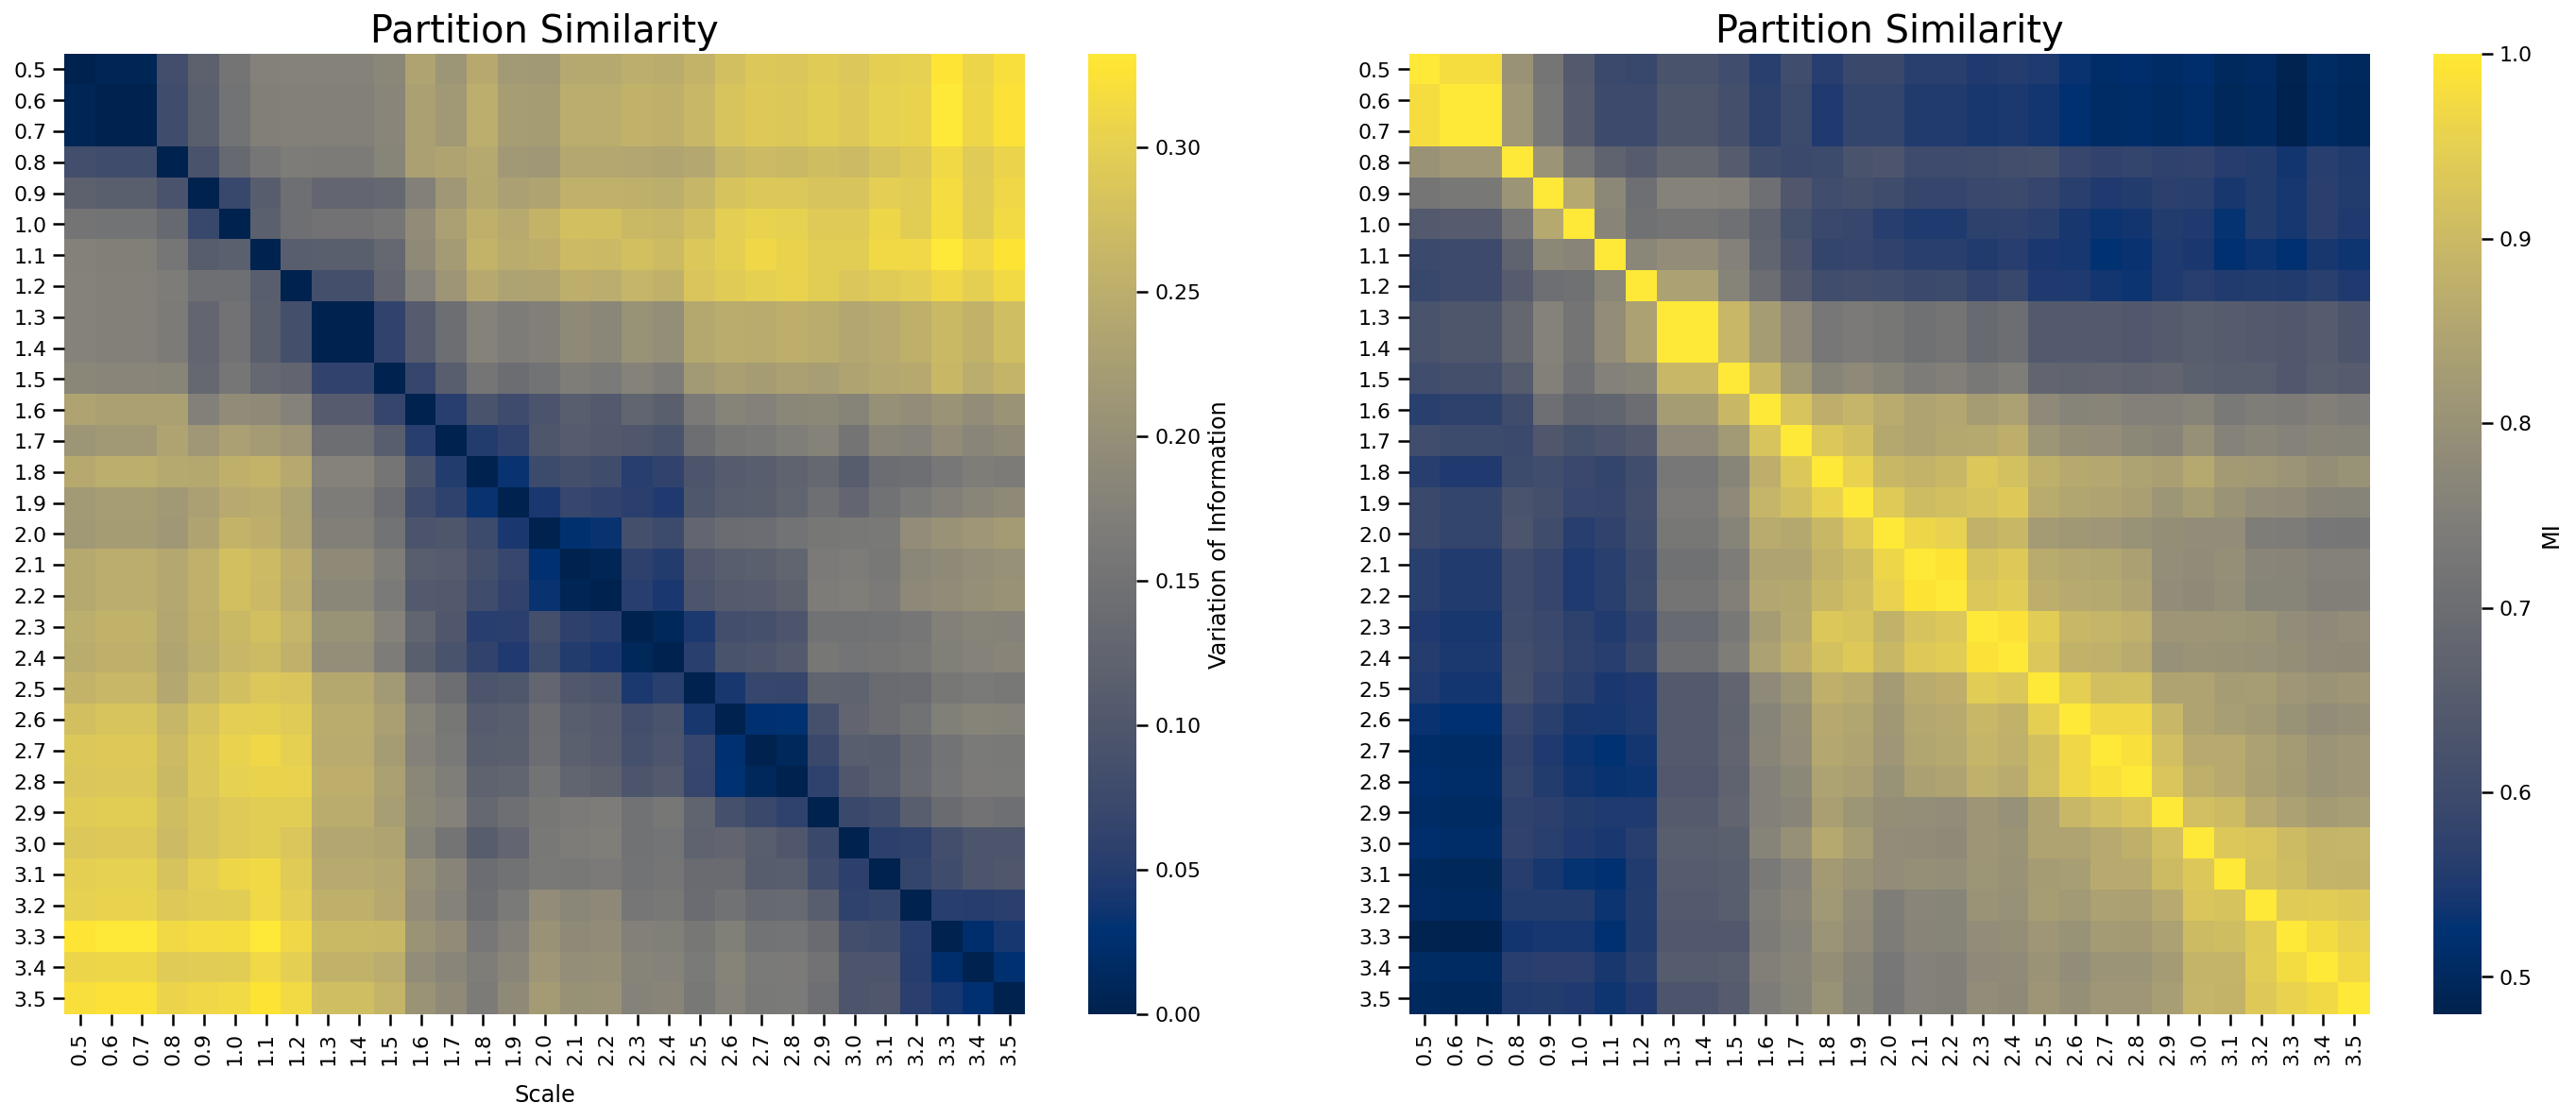

In [13]:
plot_partition_similarity(vi_mat, mi_mat)

### Plot PC Similarity

In [14]:
pc_cd, pc_sp = topological_similarity(pc_data)

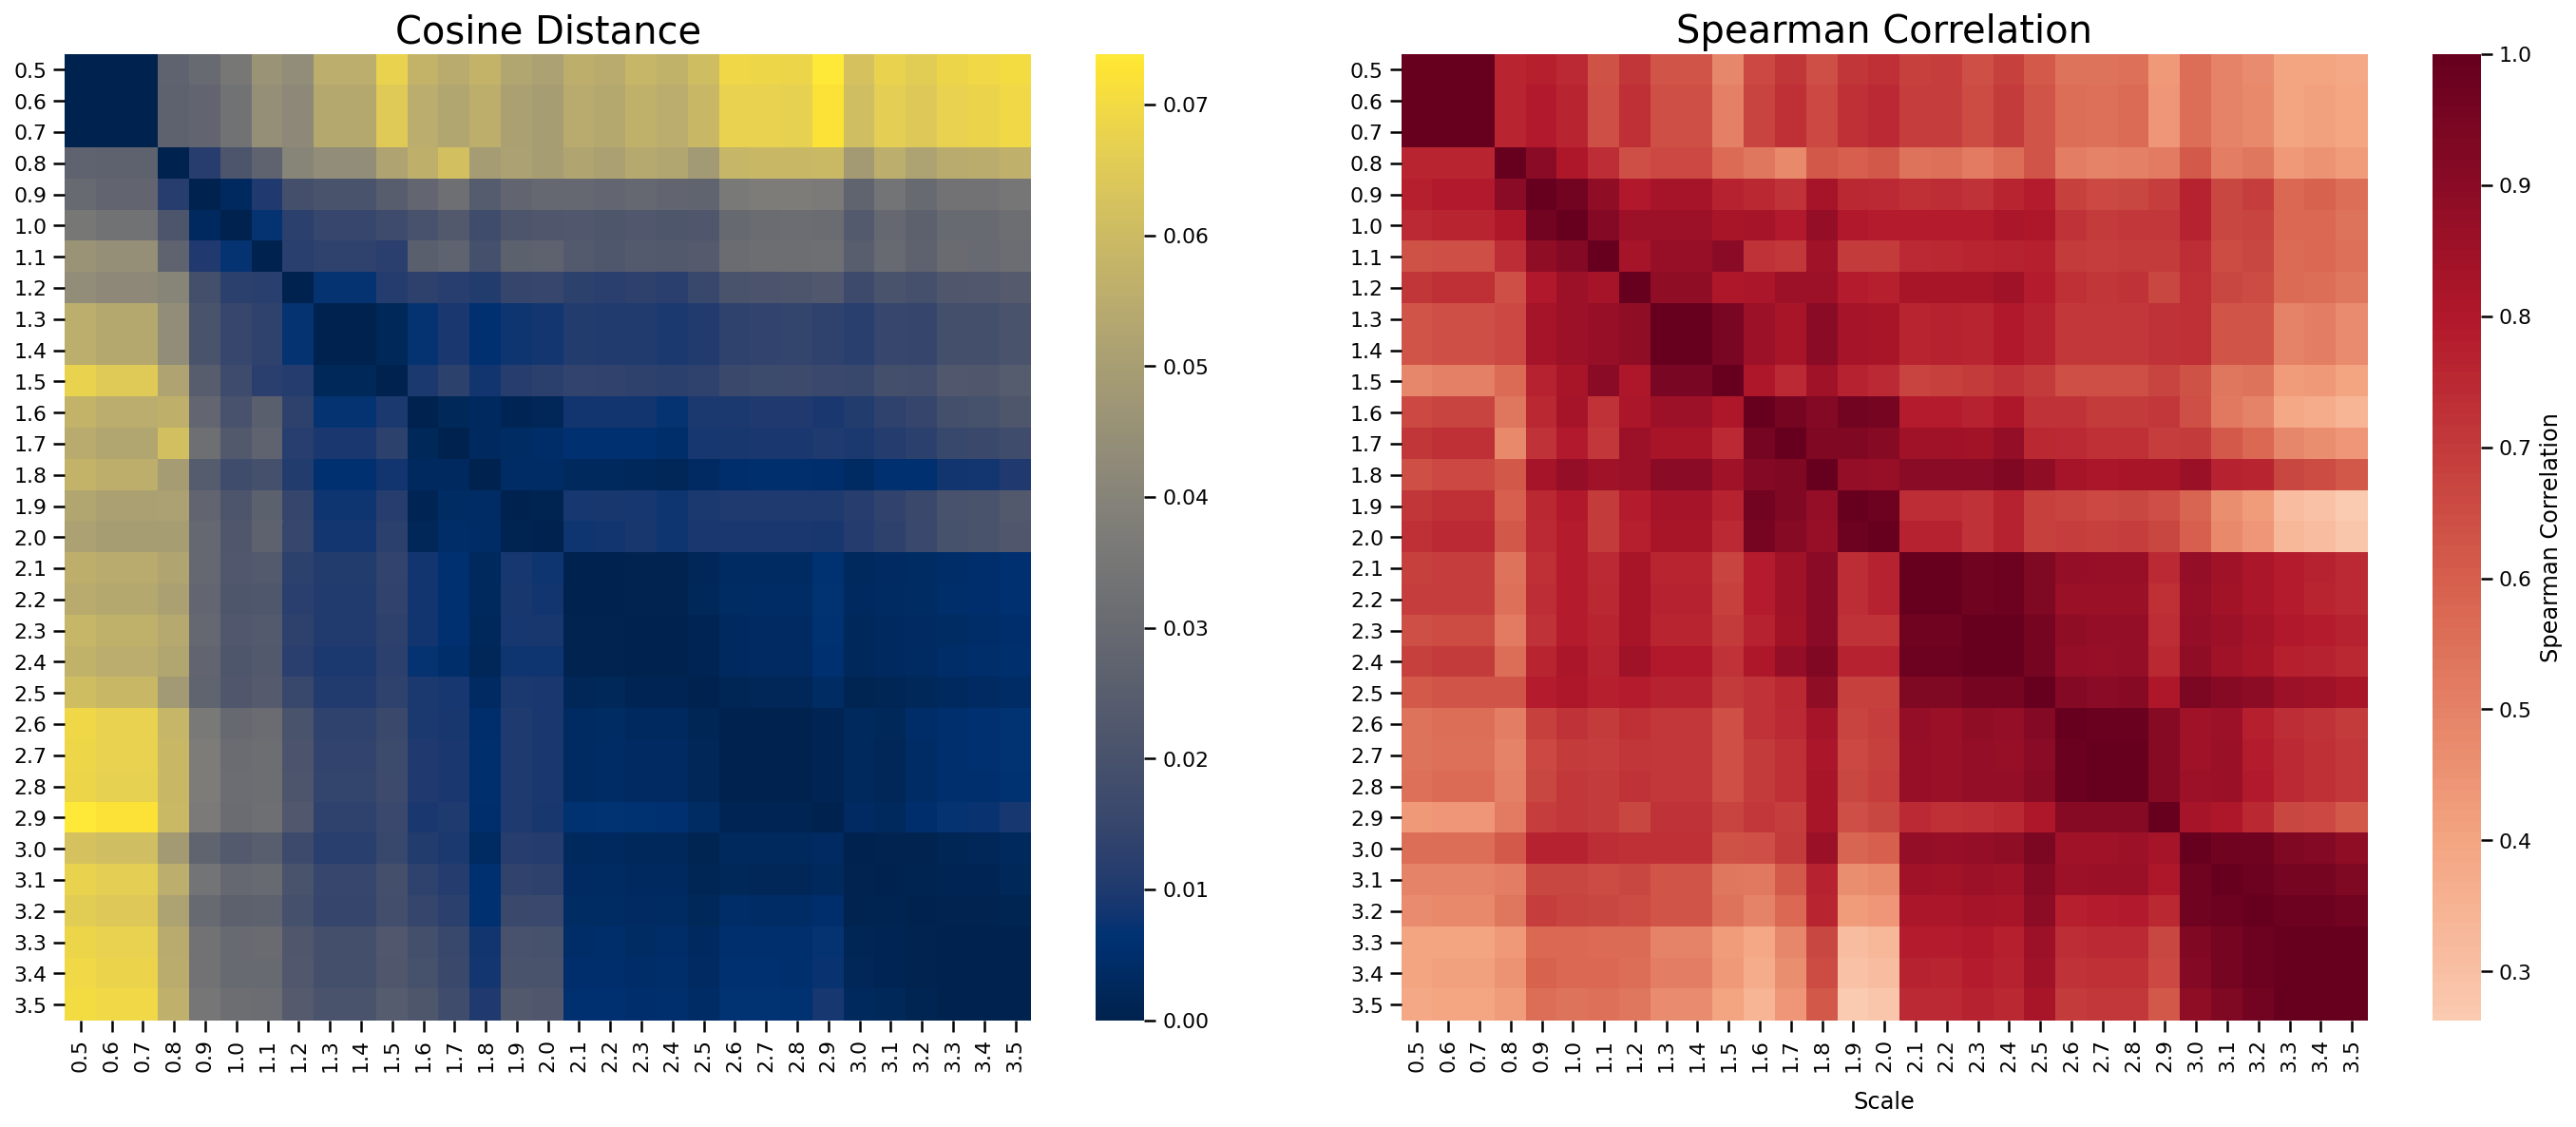

In [15]:
plot_topo_similarity(pc_cd, pc_sp)

### Plot WD Similarity

In [16]:
wd_cd, wd_sp = topological_similarity(wd_data)

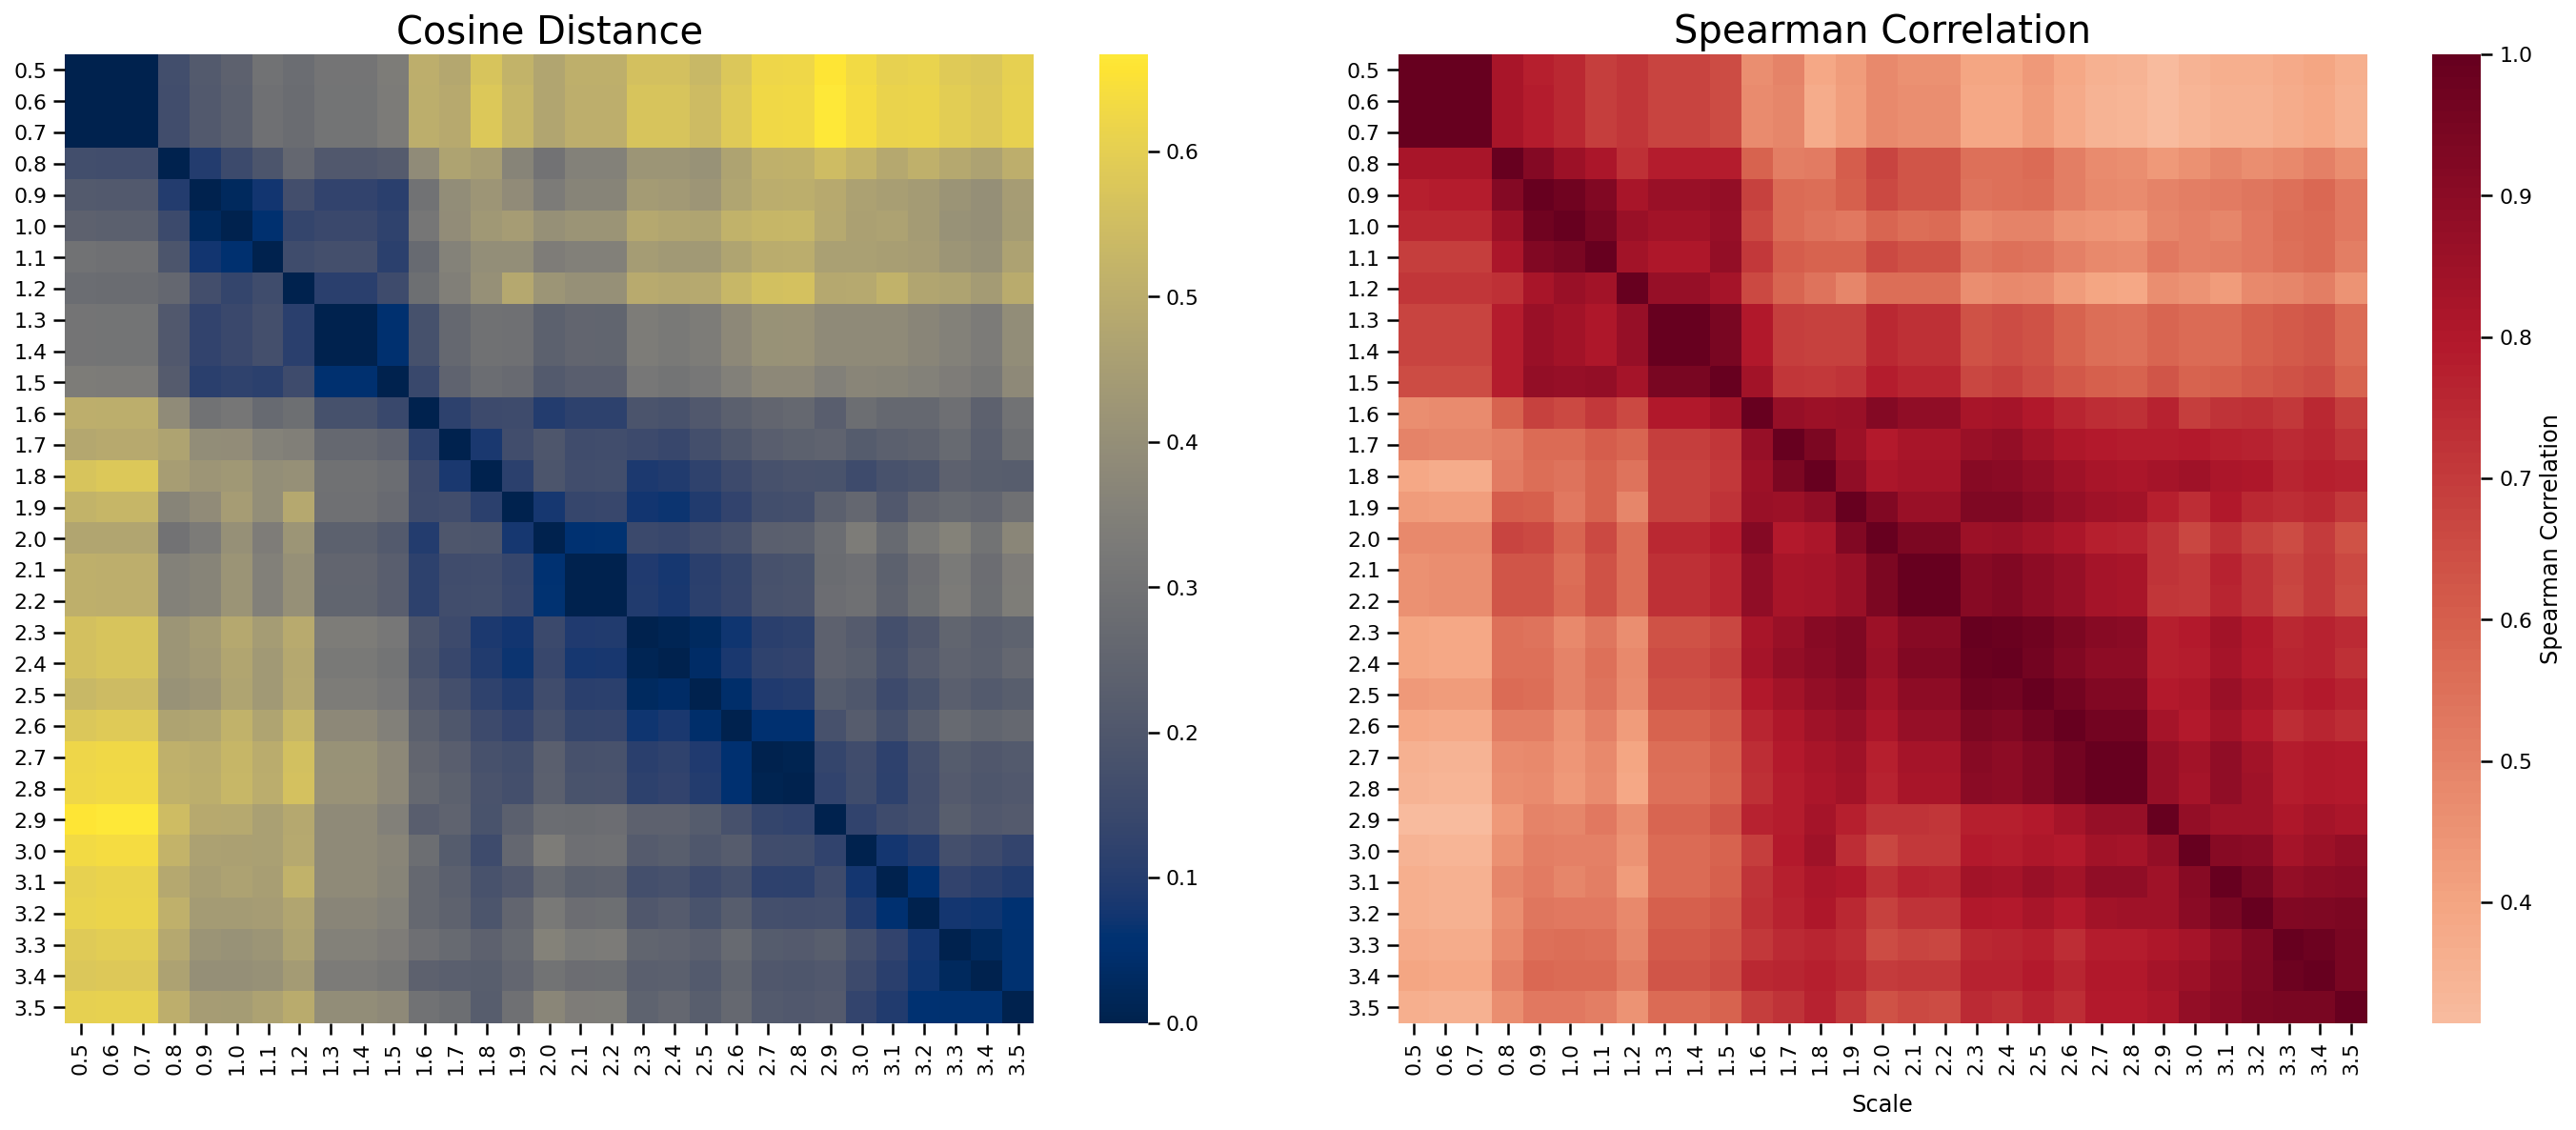

In [17]:
plot_topo_similarity(wd_cd, wd_sp)

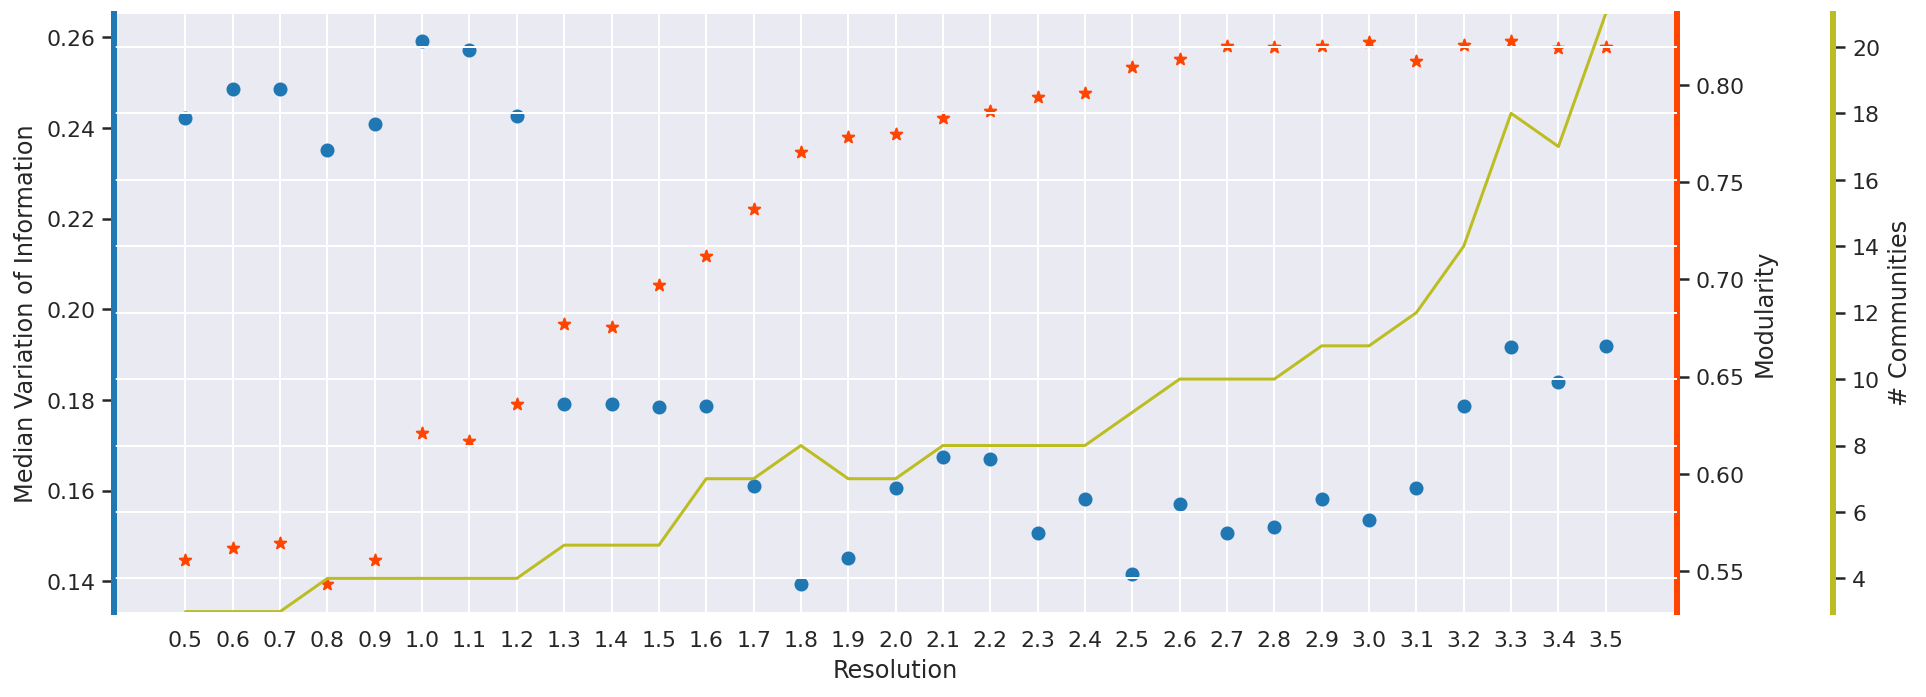

In [18]:
sns.set_style('darkgrid', {'axes.linewidth':1, 'axes.edgecolor':'black'})

fig, ax1 = plt.subplots(figsize=(14,5.5))
ax1.scatter(gamma_list, np.median(vi_mat, axis=0), label='VI', color='#1f77b4')
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.scatter(gamma_list, list(q_data), label='Q', color='orangered',  marker="*")
sns.lineplot(gamma_list, [int(len(np.unique(i))) for i in part_data], ax=ax3, color='tab:olive')
ax3.set_ylim(3,21)
ax1.set_xlabel('Resolution')
ax1.set_ylabel('Median Variation of Information')
ax2.set_ylabel('Modularity')
ax3.set_ylabel('# Communities')
ax1.spines['left'].set_color('#1f77b4')
ax2.spines['left'].set_color('#1f77b4')
ax3.spines['left'].set_color('#1f77b4')
ax2.spines['right'].set_color('orangered')
ax3.spines['right'].set_color('tab:olive')
ax2.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax3.spines['right'].set_linewidth(3)
ax1.xaxis.grid(True)
ax2.yaxis.grid(False)
ax1.yaxis.grid(False)
#fig.legend(loc='center right', bbox_to_anchor=(0.9,0.5))
ax3.spines["right"].set_position(("axes", 1.1))
sns.despine(top=True, bottom=True, right=False)

#plt.tight_layout()

In [19]:
vi_sum = np.sum(vi_mat, axis=0)
mi_sum = np.sum(mi_mat, axis=0)

In [20]:
vi_median = np.median(vi_mat, axis=0)
mi_median = np.median(mi_mat, axis=0)

In [21]:
print(f'Max MI Median: {gamma_list[np.argmax(mi_median)]}')
print(f'Min VI Median: {gamma_list[np.argmin(vi_median)]}')
print(f'Max MI Sum: {gamma_list[np.argmax(mi_sum)]}')
print(f'Min VI Sum: {gamma_list[np.argmin(vi_sum)]}')

Max MI Median: 1.8
Min VI Median: 1.8
Max MI Sum: 1.9
Min VI Sum: 1.9


### Visualize Maximally Representitive Parition

In [22]:
def prepare_communities_NCT(membership_list):
    n_communities = len(np.unique(membership_list))
    color_pallette = sns.color_palette("colorblind", n_communities).as_hex()
    module_colors = np.empty(246, dtype='object')
    for mod_id in range(1, n_communities+1):
        module_colors[membership_list == mod_id] = color_pallette[mod_id-1]
    return module_colors, color_pallette

In [23]:
def plot_connectograph(corr_mat, module_colors, cmap='RdBu_r', vmin=-1, vmax=1, center=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
    ms = sns.heatmap(corr_mat, xticklabels=False, yticklabels=False,
               vmax=vmax, vmin=vmin, cmap=cmap, ax=ax1, center=center)
    #plt.colorbar(ms, ax=ax1)
    plotting.plot_connectome(corr_mat, coord_list, node_size=50, edge_cmap='RdBu_r',
                             node_color=list(module_colors), edge_threshold='99.999%', axes=ax2)

### Gamma = 1.8

In [24]:
sns.set_style('ticks')

In [25]:
coord_list = np.loadtxt('/home/despoB/DistractWM/AllDistract/data/meta/bna_coords.txt')

In [26]:
node_memberships_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/gamma_1.8_GraphPartition.txt')

In [27]:
colors_func, pallette_func = prepare_communities_NCT(node_memberships_func)

In [28]:
reordered_mat_func = np.loadtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po_Louvain/gamma_1.8_ReorderedMatrix.txt').reshape(246,246)

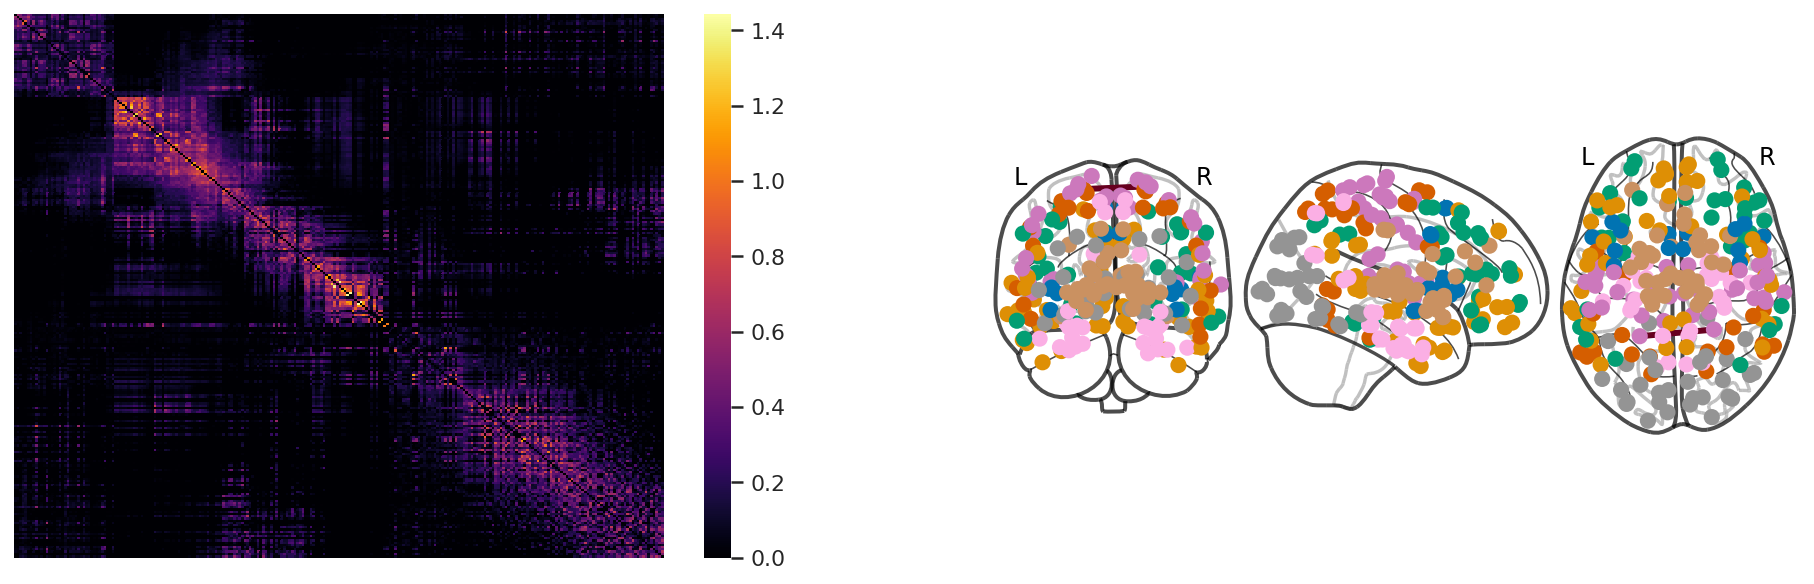

In [29]:
plot_connectograph(reordered_mat_func, colors_func, vmin=0, vmax=None, cmap='inferno')

Load BNA atlas labels.

In [58]:
atlas_lh = surface.load_surf_data('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/label/lh.BN_Atlas.annot')
atlas_rh = surface.load_surf_data('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/label/rh.BN_Atlas.annot')

Load surface meshes.

In [59]:
lh_pial = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/lh.pial')
rh_pial = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/rh.pial')
lh_infl = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/lh.inflated')
rh_infl = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/rh.inflated')

Load curvature files.

In [60]:
lh_curv = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/lh.curv')
rh_curv = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/rh.curv')

Load sulcus files.

In [61]:
lh_sulc = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/lh.sulc')
rh_sulc = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/rh.sulc')

Get an index (`idx`) of the vertices for each ROI.

In [62]:
u_lh, idx_lh = np.unique(atlas_lh, return_inverse=True)
u_rh, idx_rh = np.unique(atlas_rh, return_inverse=True)

In [63]:
coord_list = np.loadtxt('/home/despoB/DistractWM/AllDistract/data/meta/bna_coords.txt')

In [46]:
BNA_4D = image.load_img('/home/despoB/dlurie/Projects/timescale_hierarchy/viz/BNA_4D.nii.gz')

In [65]:
len(np.unique(node_memberships_func))

8

In [47]:
c10 = sns.palettes.color_palette(palette="colorblind", n_colors=10)

In [48]:
from matplotlib.colors import ListedColormap

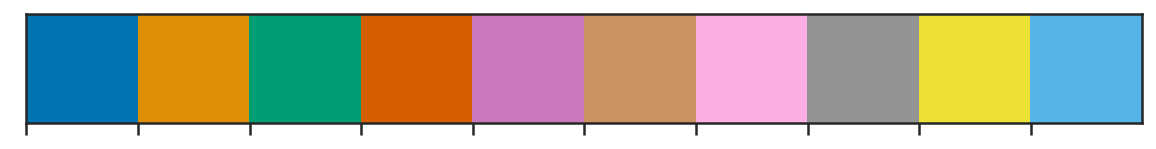

In [49]:
sns.palplot(c10)

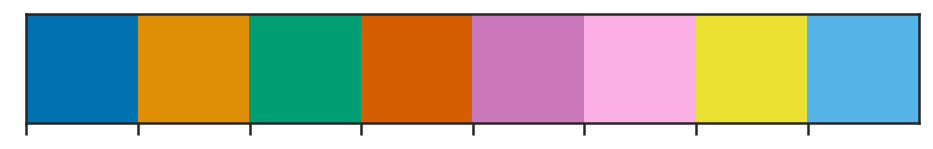

In [50]:
sns.palplot(c10[0:5]+[c10[6]]+c10[8:])

In [51]:
len(c10[0:5]+[c10[6]]+c10[8:])

8

In [52]:
c8 = ListedColormap(c10[0:5]+[c10[6]]+c10[8:], name='c8')

In [53]:
part_img = regions.signals_to_img_maps(node_memberships_func, BNA_4D)

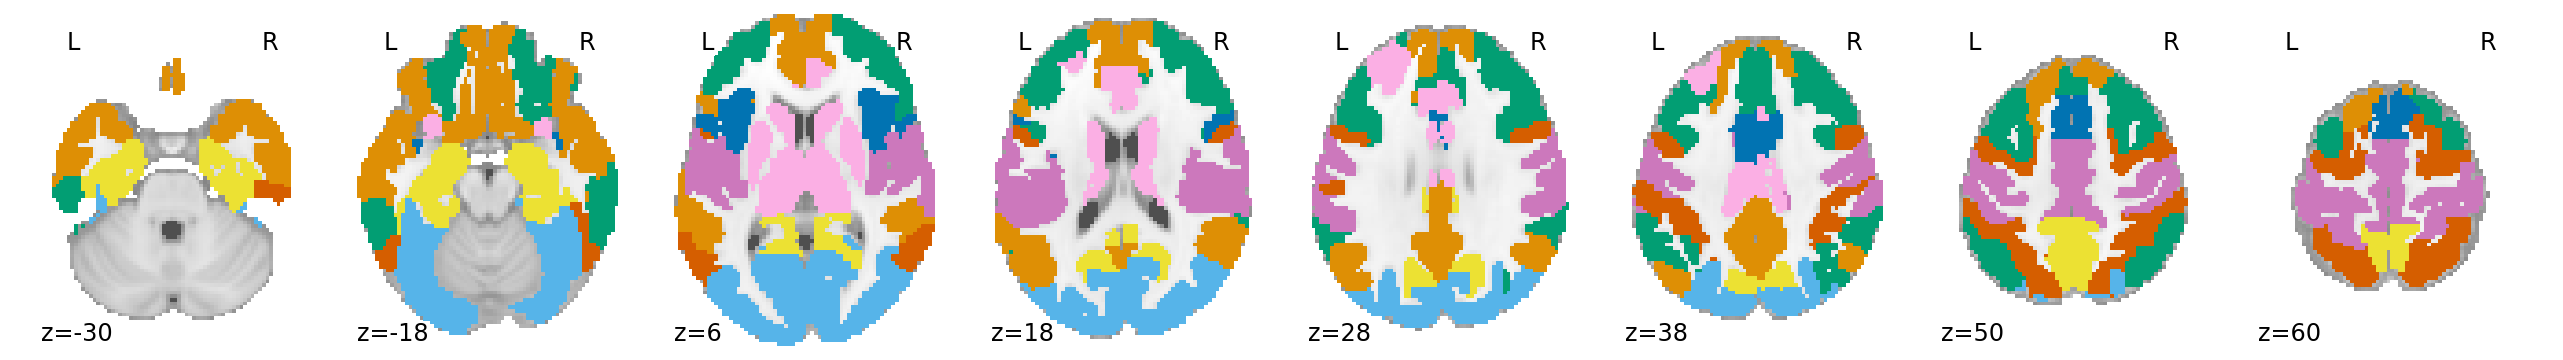

In [54]:
f = plotting.plot_roi(part_img, display_mode='z', cut_coords=[-30, -18, 6, 18, 28, 38, 50, 60],cmap=c8, vmin=1, threshold=0.1, alpha=1, colorbar=False)

In [102]:
ts_lh = node_memberships_func[:210][::2] # Select even numbered ROIs
ts_rh = node_memberships_func[:210][1::2] # Select odd numbered ROIs

In [103]:
ts_lh = np.insert(ts_lh, 0, [0,0], axis=0)
ts_rh = np.insert(ts_rh, 0, [0,0], axis=0)

In [104]:
tsmap_lh = ts_lh[idx_lh]
tsmap_rh = ts_rh[idx_rh]

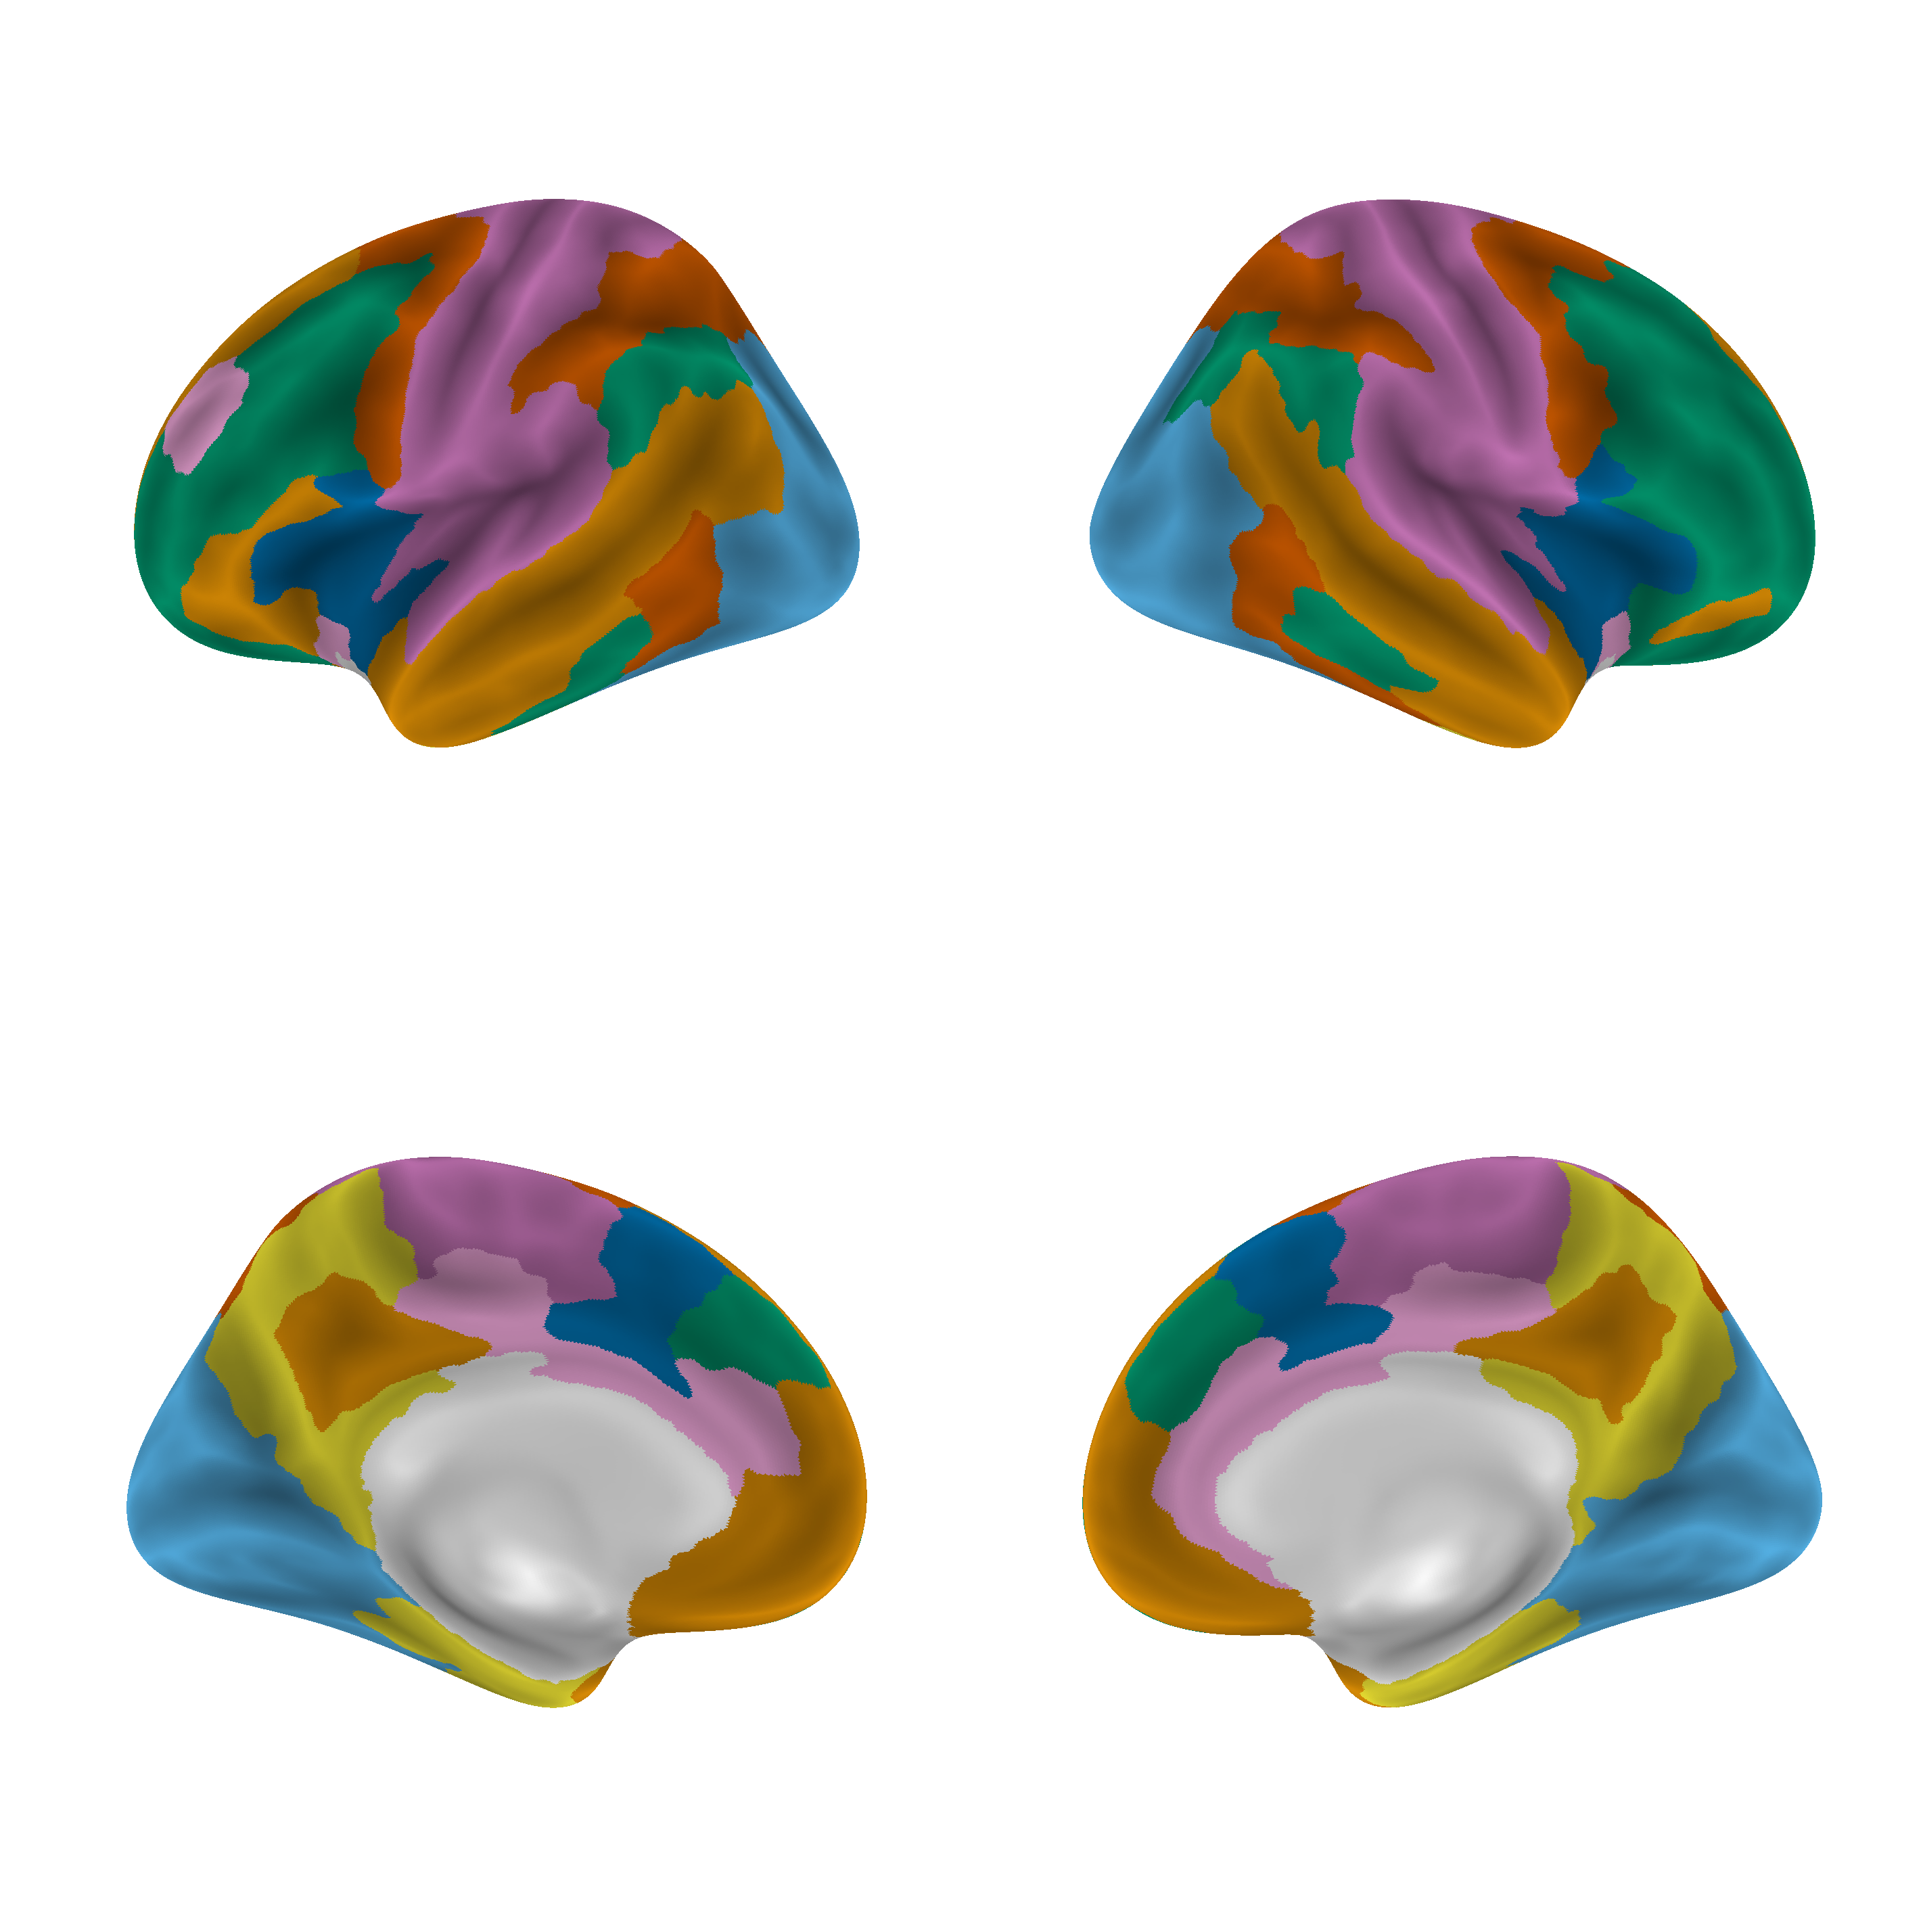

In [105]:
fig, ax = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(20,20))
a = plotting.plot_surf_roi(lh_infl, tsmap_lh, hemi='left', cmap=c8, view='lateral',
                         bg_map=lh_sulc, bg_on_data=True, darkness=0.6, vmin=1, threshold=0.1, figure=fig, axes=ax[0][0])
b = plotting.plot_surf_roi(rh_infl, tsmap_rh, hemi='right', cmap=c8, view='lateral',
                         bg_map=rh_sulc, bg_on_data=True, darkness=0.6, vmin=1, threshold=0.1, figure=fig, axes=ax[0][1])
c = plotting.plot_surf_roi(lh_infl, tsmap_lh, hemi='left', cmap=c8, view='medial',
                         bg_map=lh_sulc, bg_on_data=True, darkness=0.6, vmin=1, threshold=0.1, figure=fig, axes=ax[1][0])
d = plotting.plot_surf_roi(rh_infl, tsmap_rh, hemi='right', cmap=c8, view='medial',
                         bg_map=rh_sulc, bg_on_data=True, darkness=0.6, vmin=1, threshold=0.1, figure=fig, axes=ax[1][1])
plt.tight_layout()